# Dataset Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# Load datasets
cross_df = pd.read_csv('data/oasis_cross-sectional.csv')
long_df = pd.read_csv('data/oasis_longitudinal.csv')

In [4]:
# -------------------- BASIC INFO --------------------

print("Cross-sectional Dataset Overview:")
print(cross_df.info())
print("\nLongitudinal Dataset Overview:")
print(long_df.info())

Cross-sectional Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB
None

Longitudinal Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID    

In [5]:
# -------------------- MISSING VALUES --------------------

print("\nMissing values (Cross-sectional):")
print(cross_df.isnull().sum())

print("\nMissing values (Longitudinal):")
print(long_df.isnull().sum())


Missing values (Cross-sectional):
ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

Missing values (Longitudinal):
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [6]:
# -------------------- SUMMARY STATS --------------------

print("\nSummary statistics (Cross-sectional):")
print(cross_df.describe(include='all'))

print("\nSummary statistics (Longitudinal):")
print(long_df.describe(include='all'))


Summary statistics (Cross-sectional):
                   ID  M/F Hand         Age        Educ         SES  \
count             436  436  436  436.000000  235.000000  216.000000   
unique            436    2    1         NaN         NaN         NaN   
top     OAS1_0001_MR1    F    R         NaN         NaN         NaN   
freq                1  268  436         NaN         NaN         NaN   
mean              NaN  NaN  NaN   51.357798    3.178723    2.490741   
std               NaN  NaN  NaN   25.269862    1.311510    1.120593   
min               NaN  NaN  NaN   18.000000    1.000000    1.000000   
25%               NaN  NaN  NaN   23.000000    2.000000    2.000000   
50%               NaN  NaN  NaN   54.000000    3.000000    2.000000   
75%               NaN  NaN  NaN   74.000000    4.000000    3.000000   
max               NaN  NaN  NaN   96.000000    5.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF     Delay  
count   235.00000  235.000000

In [7]:
# -------------------- UNIQUE VALUES --------------------

print("\nUnique values per column (Cross-sectional):")
print(cross_df.nunique())

print("\nUnique values per column (Longitudinal):")
print(long_df.nunique())


Unique values per column (Cross-sectional):
ID       436
M/F        2
Hand       1
Age       73
Educ       5
SES        5
MMSE      17
CDR        4
eTIV     312
nWBV     182
ASF      282
Delay     14
dtype: int64

Unique values per column (Longitudinal):
Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64


In [8]:
# -------------------- CLASS DISTRIBUTION --------------------

if 'Group' in cross_df.columns:
    print("\nClass distribution in Cross-sectional Dataset:")
    print(cross_df['Group'].value_counts())

if 'Group' in long_df.columns:
    print("\nClass distribution in Longitudinal Dataset:")
    print(long_df['Group'].value_counts())


Class distribution in Longitudinal Dataset:
Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64


In [9]:
# -------------------- GENDER DISTRIBUTION --------------------

for df, label in zip([cross_df, long_df], ['Cross-sectional', 'Longitudinal']):
    if 'M/F' in df.columns:
        print(f"\nGender distribution ({label}):")
        print(df['M/F'].value_counts())


Gender distribution (Cross-sectional):
M/F
F    268
M    168
Name: count, dtype: int64

Gender distribution (Longitudinal):
M/F
F    213
M    160
Name: count, dtype: int64


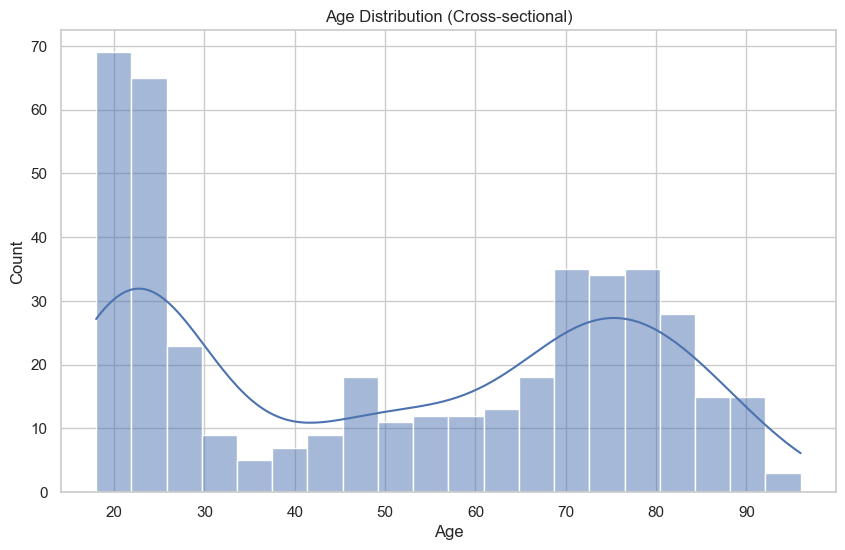

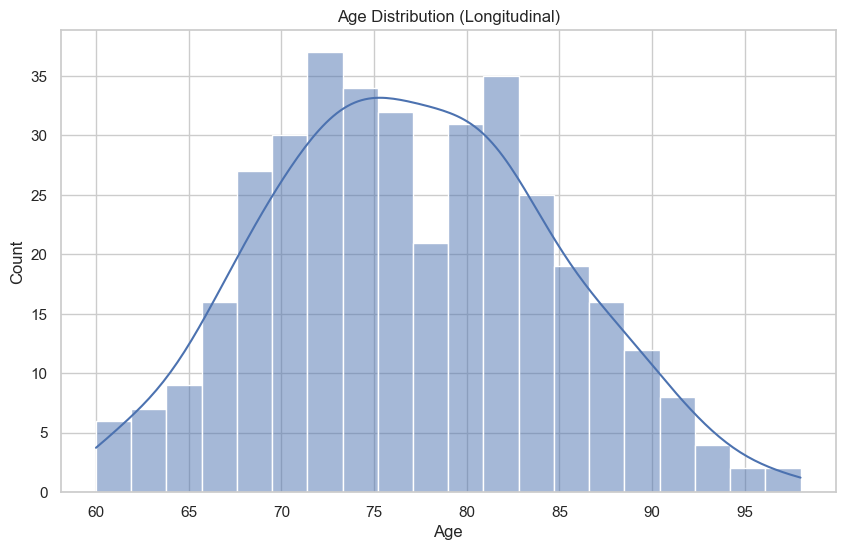

In [10]:
# -------------------- AGE DISTRIBUTION --------------------

sns.histplot(data=cross_df, x='Age', bins=20, kde=True)
plt.title("Age Distribution (Cross-sectional)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

sns.histplot(data=long_df, x='Age', bins=20, kde=True)
plt.title("Age Distribution (Longitudinal)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:





# -------------------- CORRELATION MATRICES --------------------

num_cols_cross = cross_df.select_dtypes(include=[np.number])
num_cols_long = long_df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(num_cols_cross.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Cross-sectional")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(num_cols_long.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Longitudinal")
plt.show()

# -------------------- BRAIN VOLUME BY GROUP --------------------

if 'nWBV' in long_df.columns and 'Group' in long_df.columns:
    sns.boxplot(data=long_df, x='Group', y='nWBV')
    plt.title("Normalized Whole Brain Volume by Group (Longitudinal)")
    plt.show()

if 'eTIV' in long_df.columns and 'Group' in long_df.columns:
    sns.boxplot(data=long_df, x='Group', y='eTIV')
    plt.title("Estimated Total Intracranial Volume by Group (Longitudinal)")
    plt.show()

# -------------------- MMSE SCORES --------------------

if 'MMSE' in long_df.columns:
    sns.violinplot(data=long_df, x='Group', y='MMSE')
    plt.title("MMSE Scores by Group (Longitudinal)")
    plt.show()

# -------------------- SUBJECT FOLLOW-UP ANALYSIS --------------------

if 'Subject ID' in long_df.columns and 'Visit' in long_df.columns:
    visits_per_subject = long_df.groupby('Subject ID')['Visit'].nunique()
    print("\nVisit count per subject (Longitudinal):")
    print(visits_per_subject.value_counts())

# -------------------- TRACKING CONVERSION --------------------

if 'Group' in long_df.columns and 'Subject ID' in long_df.columns:
    conv_check = long_df.groupby('Subject ID')['Group'].nunique()
    converted_subjects = conv_check[conv_check > 1].index.tolist()
    print(f"\nNumber of converting subjects: {len(converted_subjects)}")
    print("Sample of converting subject IDs:", converted_subjects[:5])

# -------------------- LONGITUDINAL MMSE TREND FOR CONVERTED SUBJECTS --------------------

if 'MMSE' in long_df.columns and 'Visit' in long_df.columns:
    converted_df = long_df[long_df['Subject ID'].isin(converted_subjects)]
    sample_subs = converted_df['Subject ID'].unique()[:5]

    for sid in sample_subs:
        sub_df = converted_df[converted_df['Subject ID'] == sid]
        plt.plot(sub_df['Visit'], sub_df['MMSE'], marker='o', label=f'Subject {sid}')
    
    plt.title("MMSE Progression in Converted Subjects (Sample)")
    plt.xlabel("Visit")
    plt.ylabel("MMSE Score")
    plt.legend()
    plt.show()


In [ ]:
# Written by Ovi, 2025-06-18
# Additional analysis on OASIS longitudinal dataset: conversion time, SES impact, normality, and class-wise distributions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # <-- missing import added here

# Load dataset
long_df = pd.read_csv("oasis_longitudinal.csv")

# -------------------- 1. TIME-TO-CONVERSION ESTIMATION --------------------

# Filter subjects who converted (Group changed across visits)
conv_check = long_df.groupby('Subject ID')['Group'].nunique()
converted_subjects = conv_check[conv_check > 1].index.tolist()

converted_df = long_df[long_df['Subject ID'].isin(converted_subjects)]

conversion_times = {}
for sid in converted_subjects:
    sub_df = converted_df[converted_df['Subject ID'] == sid].sort_values('Visit')
    visits = sub_df['Visit'].tolist()
    groups = sub_df['Group'].tolist()
    try:
        conv_idx = next(i for i, g in enumerate(groups) if g == 'Demented')
        conversion_times[sid] = visits[conv_idx]
    except StopIteration:
        continue  # Shouldn't happen

# Plot histogram of conversion time
plt.hist(list(conversion_times.values()), bins=10, edgecolor='black')
plt.title("Time to Conversion (in years)")
plt.xlabel("Years to Dementia Onset")
plt.ylabel("Number of Subjects")
plt.show()

# -------------------- 2. SES / EDUCATION IMPACT --------------------

# SES distribution by Group
if 'SES' in long_df.columns and 'Group' in long_df.columns:
    sns.boxplot(data=long_df, x='Group', y='SES')
    plt.title("Socioeconomic Status by Diagnosis Group")
    plt.show()

# Education distribution by Group
if 'Educ' in long_df.columns:
    sns.boxplot(data=long_df, x='Group', y='Educ')
    plt.title("Education (Years) by Diagnosis Group")
    plt.show()

# Correlation between SES, Education, and MMSE
if all(col in long_df.columns for col in ['SES', 'Educ', 'MMSE']):
    print("\nCorrelation between SES, Educ, MMSE:")
    print(long_df[['SES', 'Educ', 'MMSE']].corr())

# -------------------- 3. NORMALITY CHECKS --------------------

numeric_cols = long_df.select_dtypes(include=[np.number]).columns.tolist()

print("\nShapiro-Wilk Normality Test Results (p < 0.05 = not normal):")
for col in numeric_cols:
    if long_df[col].notna().sum() >= 20:  # Shapiro requires at least ~20 samples
        stat, p = stats.shapiro(long_df[col].dropna())
        print(f"{col}: p = {p:.4f} {'(Not Normal)' if p < 0.05 else '(Normal)'}")

# -------------------- 4. FEATURE DISTRIBUTIONS BY CLASS --------------------

# Plot distributions for selected features
features = ['MMSE', 'nWBV', 'eTIV', 'ASF', 'Age']

for feature in features:
    if feature in long_df.columns:
        sns.kdeplot(data=long_df, x=feature, hue='Group', fill=True, common_norm=False, alpha=0.5)
        plt.title(f"Distribution of {feature} by Group")
        plt.show()
